## 案例：中国出口货物总额与工业增加值、人民币汇率的关系

<center>
    姓名：叶家辉 <br>
    学号：201800830004
</center>

### 一、提出问题

出口是经济发展的重要一环。经济学常识告诉我们，出口货物总额可能与工业增加值、人民币汇率等因素有关。当今世界，世纪疫情与百年变局叠加，进出口环节也受到很大影响。为了定量评估当前经济新形势对中国出口货物总额的影响，并通过调整宏观政策尽可能促进经济发展，根据历史数据分析中国出口货物总额的影响因素就显得尤为重要。

本课题旨在根据1994年～2016年的相关数据建立多元线性回归模型，探索工业增加值、人民币汇率对中国出口货物总额影响的定量关系，并对所建立的回归模型进行检验。

### 二、模型设定

从经验上应该不难看出，工业增加值、人民币汇率两者应该会对出口货物总额产生共同影响，所以可以建立多元线性回归模型。

在之后的模型中，我们令$Y$代表中国货物出口总额（亿元），$X_2$代表工业增加值（亿元），$X_3$代表人民币汇率（人民币/100美元）。我们首先读入数据，并观察其特点。

      年份         Y        X2      X3
0   1994   1210.06   19546.9  861.87
1   1995   1487.80   25023.9  835.10
2   1996   1510.48   29529.8  831.42
3   1997   1827.92   33023.5  828.98
4   1998   1837.09   34134.9  827.91
5   1999   1949.31   36015.4  827.83
6   2000   2492.03   40259.7  827.84
7   2001   2660.98   43855.6  827.70
8   2002   3255.96   47776.3  827.70
9   2003   4382.28   55363.8  827.70
10  2004   5933.26   65776.8  827.68
11  2005   7619.53   77960.5  819.17
12  2006   9689.78   92238.4  797.18
13  2007  12204.56  111693.9  760.40
14  2008  14306.93  131727.6  694.51
15  2009  12016.12  138095.5  683.10
16  2010  15777.54  165126.4  676.95
17  2011  18983.81  195142.8  645.88
18  2012  20487.10  208905.6  631.25
19  2013  22090.00  222337.6  619.32
20  2014  23422.90  233856.4  614.28
21  2015  22734.70  236506.3  622.84
22  2016  20976.30  247877.7  664.23


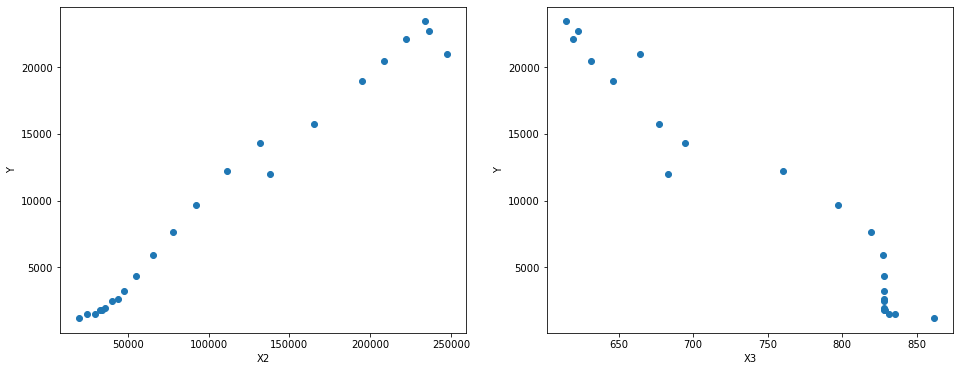

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据读入为DataFrame
df = pd.read_excel('data.xlsx',header=0)
df.rename(columns = {'出口货物总额':'Y','工业增加值':'X2','人民币汇率':'X3'},inplace = True)
print(df)

plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.scatter(df['X2'],df['Y'])
plt.xlabel("X2")
plt.ylabel("Y")

plt.subplot(1,2,2)
plt.scatter(df['X3'],df['Y'])
plt.xlabel("X3")
plt.ylabel("Y")

plt.show()

可以看出，解释变量$X_2$与被解释变量$Y$成正相关，解释变量$X_3$与被解释变量$Y$成负相关。但我们不能确定这种相关关系是否为线性关系，所以我们考虑两种模型，分别是多元线性回归模型和对数变换后的多元线性回归模型，所以可以将模型设定为以下两种形式：

$$Y_t = \hat{\beta_1} + \hat{\beta_2} X_{2t} + \hat{\beta_3} X_{3t} + u_t$$

$$lnY_t = \hat{\alpha_1} + \hat{\alpha_2} lnX_{2t} + \hat{\alpha_3} X_{3t} + u_t$$

对于模型参数的估计，我们可以使用最小二乘估计。

### 三、参数估计

和简单线性回归一样，我们需要对随机扰动项做一定的假定，在简单线性回归模型零均值假定、同方差假定、无自相关性假定、随机扰动与解释变量不相关假定和正态性假定的基础上，还需要引入无多重共线性假定。在估计时，我们也是寻找一种方法，使得剩余平方和最小，即

$$min(\sum{e_i^2}) = min(\sum(Y_i - \hat{Y_i})^2)$$

在对数变换后的多元线性回归模型中，只需要把变量取对数的结果看作新的变量即可，因此我们先讨论一般情况下的参数估计。具体的估计方法如下：

In [2]:
import statsmodels.formula.api as smf

est1 = smf.ols(formula='Y ~ X2 + X3', data=df).fit()

# 打印系数
print(est1.params)
# 打印回归结果
print(est1.summary())

Intercept    11413.342812
X2               0.085904
X3             -14.251607
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     658.5
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           5.61e-19
Time:                        20:21:32   Log-Likelihood:                -191.15
No. Observations:                  23   AIC:                             388.3
Df Residuals:                      20   BIC:                             391.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

从中我们可以得到

$$ Y = 11413.342812 + 0.085904 * X_2 - 14.251607 * X_3 $$

$$ SE = (9006.509)\ \ (0.012)\ \ (10.306) $$

$$ t = (1.267)\ \ (7.458)\ \ (-1.383) $$

$$ R^2 = 0.985\ \ \ \ \overline{R^2} = 0.984\ \ \ \ F = 658.5\ \ \ \ df = 20 $$

另一方面，对于$lnY_t = \hat{\alpha_1} + \hat{\alpha_2} lnX_{2t} + \hat{\alpha_3} X_{3t} + u_t$的模型，只需对被解释变量$Y$和解释变量$X_2$取对数，然后重复上述求解过程即可。具体的方法为：

In [3]:
import numpy as np
import statsmodels.formula.api as smf

df['lnY'] = np.log(df['Y'])
df['lnX2'] = np.log(df['X2'])

est2 = smf.ols(formula='lnY ~ lnX2 + X3', data=df).fit()

# 打印系数
print(est2.params)
# 打印回归结果
print(est2.summary())

Intercept   -10.158785
lnX2          1.512610
X3            0.002427
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    lnY   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     782.9
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.02e-19
Time:                        20:21:32   Log-Likelihood:                 16.680
No. Observations:                  23   AIC:                            -27.36
Df Residuals:                      20   BIC:                            -23.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

从中我们可以得到

$$ lnY = -10.158785 + 1.512610 * lnX_2 + 0.002427 * X_3 $$

$$ SE = (1.665)\ \ (0.092)\ \ (0.001) $$

$$ t = (-6.101)\ \ (16.372)\ \ (2.834) $$

$$ R^2 = 0.987\ \ \ \ \overline{R^2} = 0.986\ \ \ \ F = 782.9\ \ \ \ df = 20 $$

### 四、模型检验

#### 4.1 拟合优度检验

可决系数表示的是总变差中由模型做出了解释的部分所占的比重，多重可决系数可表示为

$$R^2 = {\sum{(\hat{Y_i}-\overline{Y})^2}\over{\sum{(Y_i-\overline{Y})^2}}} = 1-{{\sum{e_i^2}}\over \sum{y_i^2}}$$

需要注意的是，多重可决系数是模型中解释变量个数的不减函数，在对比不同模型的多重可决系数时会带来缺陷，所以需要修正。修正的可决系数为：

$$\overline{R^2} = 1-{{\sum{e_i^2}/(n-k)}\over \sum{y_i^2}/(n-1)} = 1 - {{n-1}\over{n-k}}{{\sum{e_i^2}}\over \sum{y_i^2}}$$

从上面的结果可以看出，可决系数$R^2 = 0.985$，修正后的可决系数$\overline{R^2} = 0.984$，说明模型对样本的拟合较好。

另一方面，对于对数变换后的模型，可决系数$R^2 = 0.987$，修正后的可决系数$\overline{R^2} = 0.986$，说明模型对样本的拟合较好。

#### 4.2 F检验

多元回归由于存在多个解释变量，所以需要说明所有解释变量联合起来对被解释变量影响的总体显著性，或整个方程总的联合显著性。这就需要在方差分析的基础上进行F检验。建立统计量

$$F = {{{ESS/(k-1)}\over{RSS/(n-k)}} ～ F(k-1,n-k)}$$

给定显著性水平$\alpha = 0.05$，在F分布中查出自由度为$k-1=2$，$n-k=20$的临界值$F_{0.05}{(2,20)} = 3.49$。而$F = 658.5 > F_{0.05}{(2,20)} = 3.49$，所以应该拒绝原假设$H_0: \beta_2 = \beta_3 = 0$，说明回归方程显著，即“工业增加值”和“人民币汇率”联合起来确实对“出口货物总额”有显著影响。

另一方面，对于对数变换后的模型，给定显著性水平$\alpha = 0.05$，在F分布中查出自由度为$k-1=2$，$n-k=20$的临界值$F_{0.05}{(2,20)} = 3.49$。而$F = 782.9 > F_{0.05}{(2,20)} = 3.49$，所以应该拒绝原假设$H_0: \alpha_2 = \alpha_3 = 0$，说明回归方程显著，即取对数的“工业增加值”和“人民币汇率”联合起来确实对取对数的“出口货物总额”有显著影响。

#### 4.3 t检验

除了检验多个解释变量联合起来对被解释变量的显著性，还需要检验各个解释变量独自对被解释变量的显著性，这就需要分别对每个回归系数逐个地进行t检验。由此我们可以发现，在一元回归中F检验与t检验等价，且$F=t^2$，但在多元回归中F检验与t检验作用不同，故需要分别进行。

若给定显著性水平$\alpha = 0.05$，查t分布表可得自由度为$n-k = 20$时临界值$t_{0.025}(20) = 2.086$，而$\beta_2$的t统计量$t=7.458 > t_{0.025}(20) = 2.086$，表明在给定显著性水平的条件下拒绝原假设，$\beta_3$的t统计量$t=-1.383$，表明在给定显著性水平的条件下还不能拒绝原假设。即认为，“工业增加值”对“出口货物总额”有显著影响，“人民币汇率”对“出口货物总额”没有显著影响。这也说明我们的这个模型可能不够完备，需要做出修改。

另一方面，对于对数变换后的模型，若给定显著性水平$\alpha = 0.05$，查t分布表可得自由度为$n-k = 20$时临界值$t_{0.025}(20) = 2.086$，而$\alpha_2$的t统计量$t=16.372 > t_{0.025}(20) = 2.086$，$\alpha_3$的t统计量$t=2.834 > t_{0.025}(20) = 2.086$，表明在给定显著性水平的条件下都能拒绝原假设。即认为，取对数的“工业增加值”、“人民币汇率”分别对取对数的“出口货物总额”有显著影响。这说明我们进行的对数变换是合理的，能够有效提高解释变量各自的显著性水平。

#### 4.4 经济意义检验

普通的多元线性回归模型表示，工业增加值每增加1亿元，出口货物总额就增加0.085904亿元，人民币对每100元美元的汇率每增加1元，出口货物总额就减少14.251607亿元。这比较符合经济学原理，即工业增加值提高，相应出口额也会提高；人民币升值，则人民币购买力提高，有利于进口但不利于出口。

对数变换后的多元线性回归模型表示，工业增加值每增加1%，出口货物总额就增加1.51261%，人民币对每100元美元的汇率每增加1%，出口货物总额就增加0.002427%，这也能够与经济理论相吻合，并能更好地解释观测数据。